# Data Summary and Businesss Problem

- Insert the data descriptions and the link etc.

# Model Prep

In [66]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# set seed
import random
random.seed(5600)

In [67]:
#Load in the data and store it as ride

ride_full = pd.read_csv('../../02_project/data/rideshare_subset.csv')
ride_full = ride_full.dropna()
ride_full.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03
mean,1.544055e+09,11.725803,17.716627,11.592528,16.577671,2.218396,1.014475,42.338177,-71.065831,39.674381,36.018999,0.008880,0.143094,0.739600,6.137035,8.420939,1.544058e+09,8.534505,45.110201,1.544058e+09,34.220793,1.544110e+09,41.714448,1.544058e+09,30.225598,1.544107e+09,31.694706,1010.335722,219.689753,0.680542,0.248634,8.534505,312.942277,1.544035e+09,1.544069e+09,0.574903,0.037227,1.544052e+09,33.445040,1.544050e+09,45.325078,1.544056e+09,29.743240,1.544056e+09,42.088986,1.544056e+09
std,6.892093e+05,6.960787,9.947628,0.491418,9.070030,1.132395,0.097195,0.048034,0.020318,6.851340,8.065333,0.027257,0.324053,0.137669,3.152868,5.310053,6.936693e+05,2.527096,6.036917,6.936789e+05,6.315467,6.920019e+05,7.700090,6.940228e+05,7.923045,6.925180e+05,9.205721,13.504567,97.808975,0.362728,0.476514,2.527096,27.673767,6.910567e+05,6.905803e+05,0.246494,0.055250,6.911293e+05,6.539092,6.902815e+05,5.691830,6.901182e+05,7.148098,6.875209e+05,6.982644,6.909731e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.030000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.860000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543445e+09,6.000000,13.000000,11.000000,9.500000,1.340000,1.000000,42.350300,-71.081000,36.270000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.540000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.430000,999.890000,129.000000,0.350000,0.000000,8.540000,290.600000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543746e+09,12.000000,17.000000,12.000000,14.000000,2.210000,1.000000,42.351900,-71.063100,40.680000,36.010000,0.000000,0.000000,0.710000,5.680000,7.330000,1.543756e+09,9.876000,44.680000,1.543788e+09,34.180000,1.543817e+09,41.380000,1.543788e+09,30.030000,1.543817e+09,30.890000,1009.850000,256.000000,0.820000,0.000000,9.876000,305.500000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543748e+09,41.380000,1.543788e+09
75%,1.544831e+09,18.000000,28.000000,12.000000,22.500000,2.960000,1.000000,42.364700,-71.054200,43.610000,40.720000,0.000000,0.000000,0.880000,8.390000,11.740000,1.544846e+09,9.996000,47.060000,1.544814e+09,38.880000,1.544836e+09,44.120000,1.544818e+09,35.320000,1.544836e+09,38.560000,1021.940000,303.000000,1.000000,

- ADD SOME COMMENTS

In [68]:
#There is a lot of columns that we really do not need so we will trim downn the dataset 
columns_to_keep = ['price', 'hour', 'distance', 'surge_multiplier', 'precipProbability', 'name']

ride = ride_full[columns_to_keep]
ride.head()

,price,hour,distance,surge_multiplier,precipProbability,name
0,11.0,14,3.07,1.00,0.00,Lyft
1,8.0,13,1.89,1.00,0.61,UberPool
2,11.0,0,1.74,1.25,1.00,Lyft
3,14.0,21,1.50,1.00,0.00,UberXL
4,22.5,21,3.21,1.00,0.00,Lux


In [69]:
#get the dummies for categorical data

ride_dummies = pd.get_dummies(data = ride, drop_first= True, dtype= int)
ride_dummies.columns

Index(['price', 'hour', 'distance', 'surge_multiplier', 'precipProbability',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

### Refference Columns
- Name_Black

# EDA

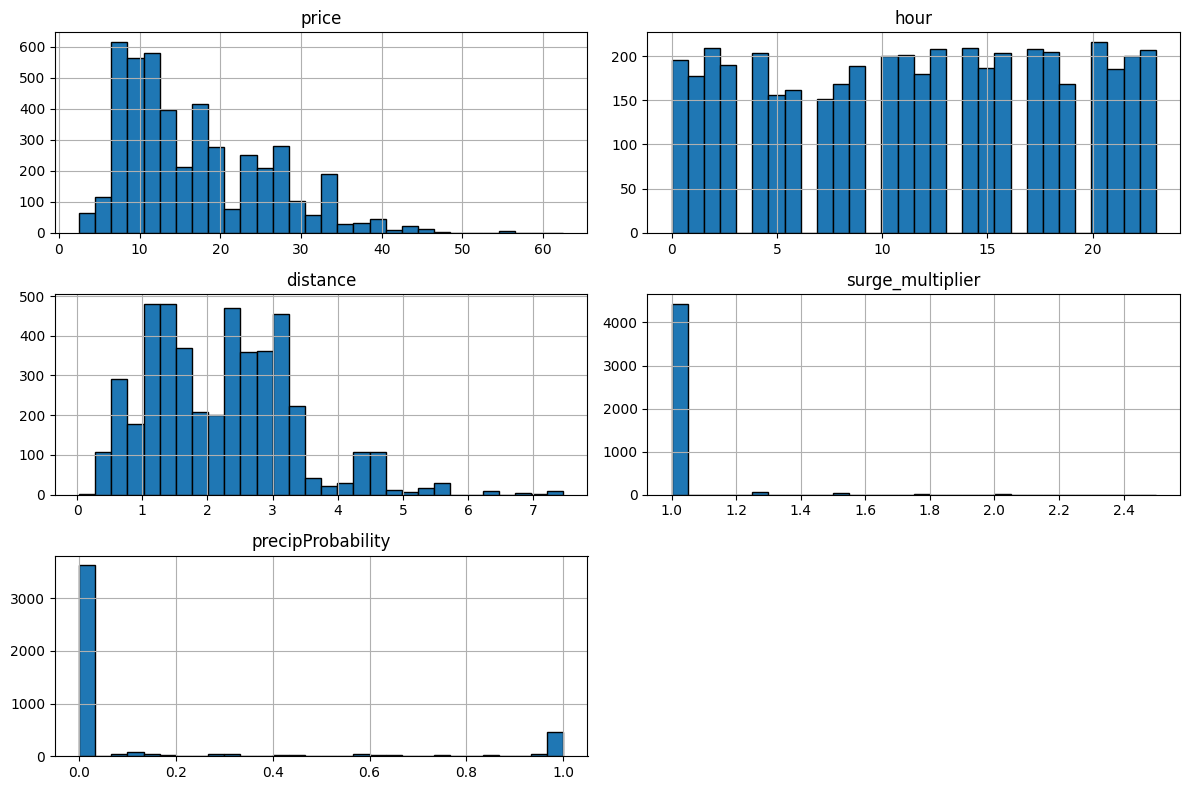

In [70]:
# Create histograms for each numerical column
ride.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout() 
plt.show()

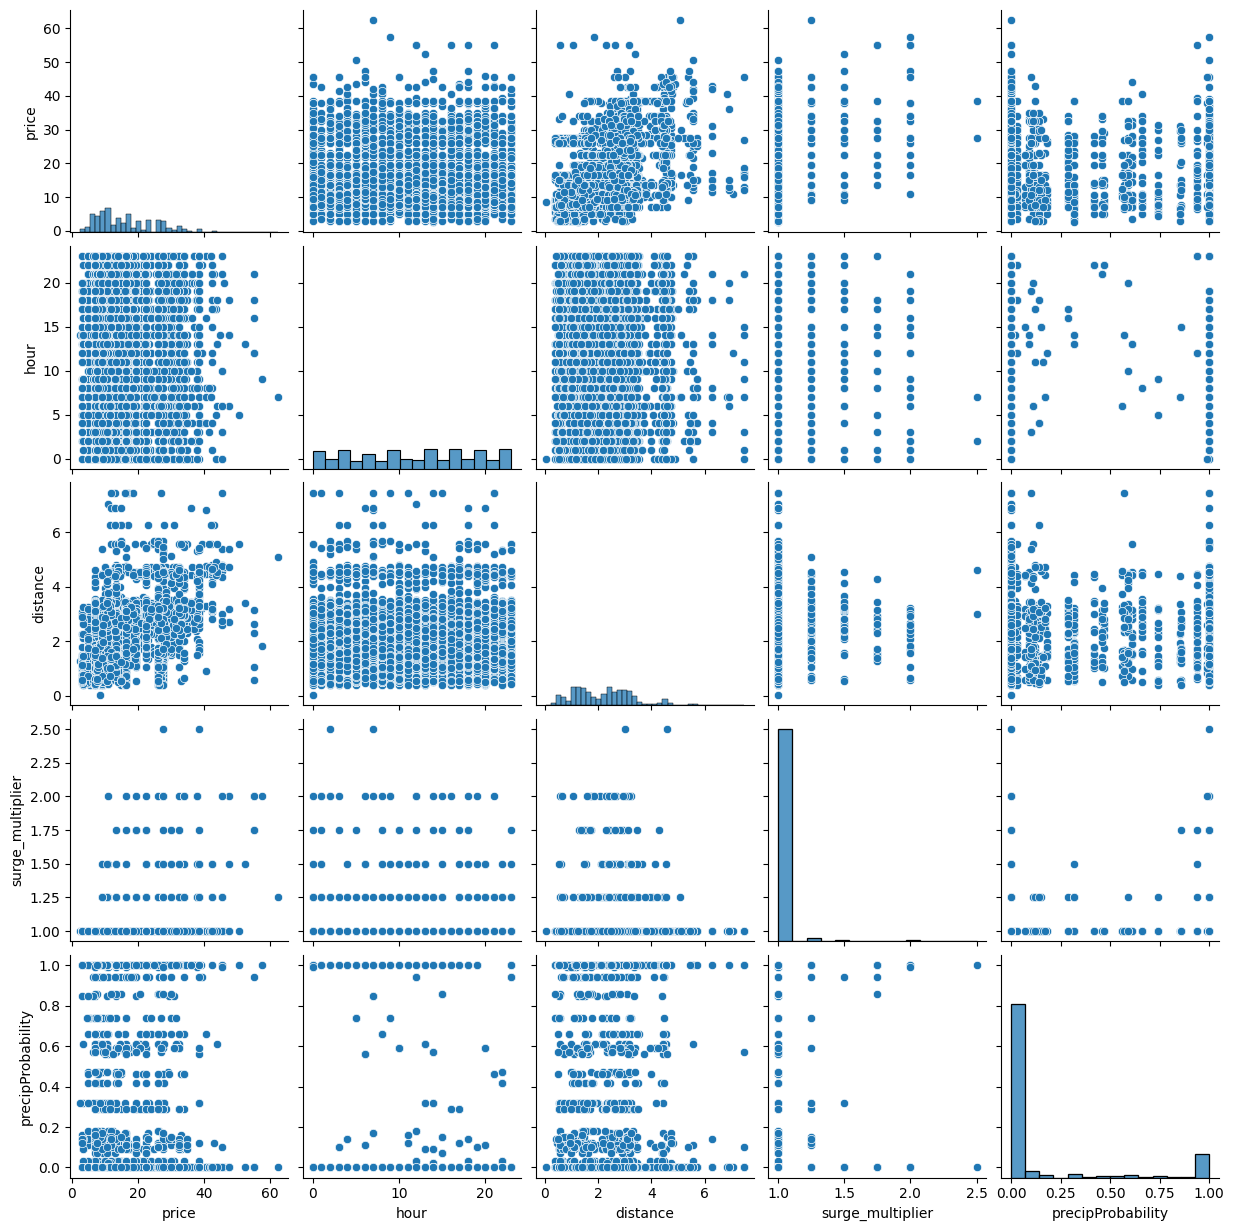

In [71]:
sns.pairplot(ride)

- ADD SOME COMMENTS

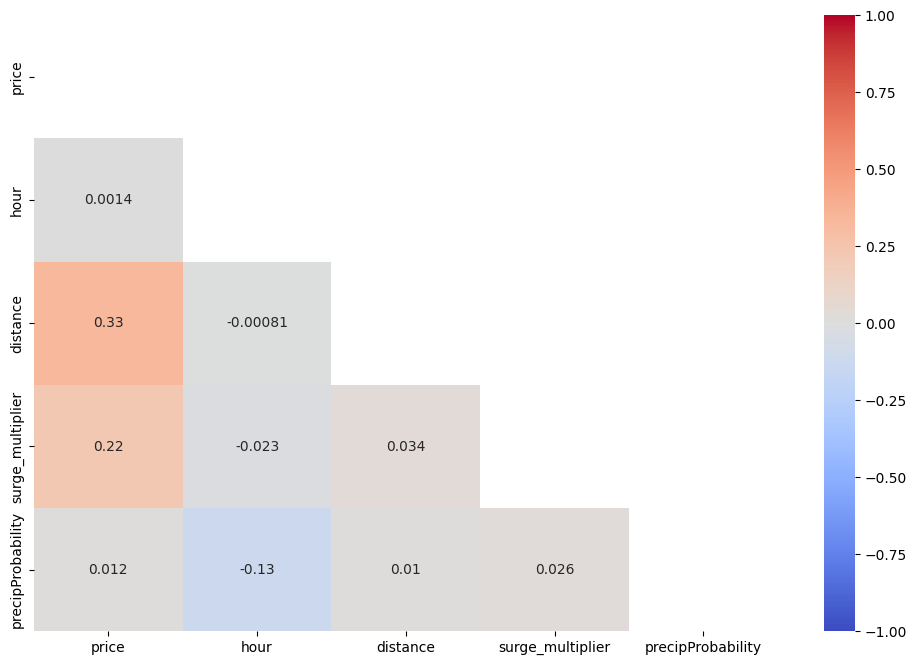

In [72]:
# Compute correlation matrix once
corr_matrix = ride.select_dtypes(include=['number']).corr()

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm',  # Color palette
            annot=True,  # Show correlation values
            vmin=-1, vmax=1,  # Normalize color scale
            mask=np.triu(corr_matrix))  # Hide upper triangle

plt.show()

- ADD SOME COMMENTS

# Baseline Model

In [73]:
y = ride_dummies['price']
X = sm.add_constant(ride_dummies.iloc[:, 1:16]) 
mod = sm.OLS(y, X)
res = mod.fit()

ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4091.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:45:07   Log-Likelihood:                -10474.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4561   BIC:                         2.108e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5598      0.398     -6.424      0.000      -3.341      -1.779
hour                  0.0050      0.005      0.969      0.333      -0.005       0.015
distance              2.7191      0.031     87.027      0.000       2.658       2.780
surge_multiplier     16.7777      0.370     45.309      0.000      16.052      17.504
precipProbability     0.0087      0.110      0.079      0.937      -0.207       0.225
name_Black SUV       10.1816      0.171     59.512      0.000       9.846      10.517
name_Lux             -3.0338      0.172    -17.601      0.000      -3.372      -2.696
name_Lux Black        2.2987      0.169     13.590      0.000       1.967       2.630
name_Lux Black XL    11.2138      0.173     64.695      0.000      10.874      11.554
name_Lyft           -11.1621      0.175    -63.950      0.000     -11.504     -10.820
name_Lyft XL         -5.5068      0.171    -32.184      0.000      -5.842      -5.171
name_Shared         -13.9663      0.174    -80.438      0.000     -14.307     -13.626
name_UberPool       -11.4813      0.170    -67.642      0.000     -11.814     -11.149
name_UberX          -10.7128      0.167    -64.010      0.000     -11.041     -10.385
name_UberXL          -4.6670      0.169    -27.630      0.000      -4.998      -4.336
name_WAV            -10.4999      0.168    -62.476      0.000     -10.829     -10.170
==============================================================================
Omnibus:                     1406.154   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13407.813
Skew:                           1.186   Prob(JB):                         0.00
Kurtosis:                      11.042   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regularization and Variable Selection

### Sequential Replacement

In [74]:
seqrep_selection = SFS(LinearRegression(fit_intercept = True), 
                                        k_features = (1, len(X.columns)), 
                                        forward = True, 
                                        floating = True,
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)

seqrep = seqrep_selection.fit(X, y)

print('Sequential Replacement Stepwise Selection:', seqrep.k_feature_names_)

Sequential Replacement Stepwise Selection: ('const', 'distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV')


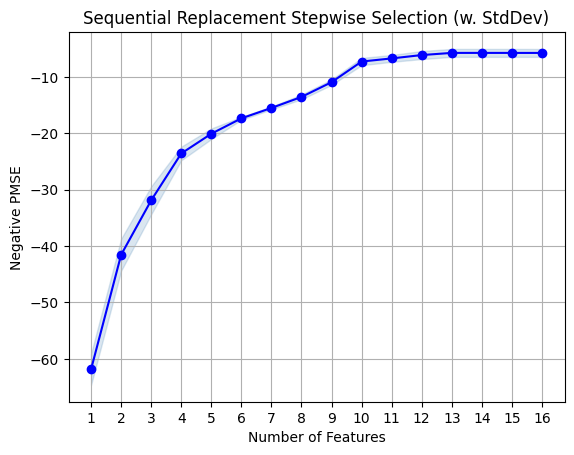

In [75]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(seqrep.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Replacement Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [76]:
# Code to see the next best models
seqrep_results = pd.DataFrame.from_dict(seqrep.get_metric_dict()).T
seqrep_results_sorted = seqrep_results.sort_values(by = 'avg_score', ascending = False)
seqrep_results_sorted.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-5.895364274318595, -5.13034641770538, -6.841...",-5.748426,"(const, distance, surge_multiplier, name_Black...",0.905344,0.704389,0.352194
13,"(2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-5.895364274318589, -5.130346417705384, -6.84...",-5.748426,"(distance, surge_multiplier, name_Black SUV, n...",0.905344,0.704389,0.352194
15,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-5.89952264533426, -5.128989699167902, -6.840...",-5.750634,"(const, hour, distance, surge_multiplier, name...",0.907761,0.706269,0.353135
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-5.8998638925001, -5.131406354699063, -6.8429...",-5.754456,"(const, hour, distance, surge_multiplier, prec...",0.903673,0.703089,0.351544
12,"(2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-6.344060386936098, -5.468742699669373, -7.24...",-6.132847,"(distance, surge_multiplier, name_Black SUV, n...",0.917728,0.714023,0.357012
11,"(2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 15)","[-7.121242516892548, -6.173287500514865, -7.61...",-6.726705,"(distance, surge_multiplier, name_Black SUV, n...",0.779283,0.606309,0.303154
10,"(2, 3, 5, 7, 8, 9, 11, 12, 13, 15)","[-7.637819805418815, -6.687562294331439, -8.22...",-7.28189,"(distance, surge_multiplier, name_Black SUV, n...",0.827682,0.643965,0.321983
9,"(2, 3, 5, 7, 8, 9, 11, 12, 13)","[-11.56513758192045, -10.105005738213125, -10....",-10.942653,"(distance, surge_multiplier, name_Black SUV, n...",0.620756,0.482969,0.241484
8,"(2, 3, 5, 7, 8, 9, 11, 12)","[-14.344451546389005, -13.100700392091642, -13...",-13.557407,"(distance, surge_multiplier, name_Black SUV, n...",0.54186,0.421585,0.210793
7,"(2, 3, 5, 7, 8, 11, 12)","[-15.734037224116383, -15.105294804222389, -15...",-15.509702,"(distance, surge_multiplier, name_Black SUV, n...",0.321894,0.250444,0.125222


- ADD COMMENTS

### Elastic Net

In [77]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)

# run cross-validation to find the best alpha and l1_ratio
ElasticNetCV_model = ElasticNetCV(alphas = potential_alphas, 
                                  cv = 5, 
                                  random_state = 12345, 
                                  max_iter = 10000, 
                                  fit_intercept = True)
ElasticNetCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = ElasticNetCV_model.alphas_
pmse_means = np.mean(ElasticNetCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(ElasticNetCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.00014734543096198358
One SE alpha: 0.005388438442608223


In [78]:
# Elastic Net results with lambda within one SE of the mean
en_1se = ElasticNet(alpha = alpha_1se,
                     fit_intercept = True)
en_1se.fit(X, y)

# Get coefficients
print(list(zip(en_1se.coef_, X)))

[(0.0, 'const'), (0.00451786058692106, 'hour'), (2.7191646378897327, 'distance'), (12.672952864052187, 'surge_multiplier'), (0.015496281824896395, 'precipProbability'), (10.934127529901923, 'name_Black SUV'), (-1.6638932249376328, 'name_Lux'), (3.4231424974959963, 'name_Lux Black'), (12.040223501207032, 'name_Lux Black XL'), (-9.477157465073411, 'name_Lyft'), (-4.015924960559478, 'name_Lyft XL'), (-12.35570288656604, 'name_Shared'), (-9.984780845518465, 'name_UberPool'), (-9.257335129462431, 'name_UberX'), (-3.3841368343280926, 'name_UberXL'), (-9.045494718809984, 'name_WAV')]


### Variable Selection Summary

- List the variables selected and a summary as to why

# Rerun the Model With Best Variables Selected

In [79]:
#Create a new subset dataframe with the best vars chosen

ride_trim = ride.copy()
ride_trim = pd.get_dummies(ride_trim, drop_first= True, dtype= int)
ride_trim = ride_trim.drop(columns = ['hour', 'apparentTemperature'])

KeyError: "['apparentTemperature'] not found in axis"

In [ ]:
ride_trim.head()

,price,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,11.0,3.07,1.00,0,0,0,0,1,0,0,0,0,0,0
1,8.0,1.89,1.00,0,0,0,0,0,0,0,1,0,0,0
2,11.0,1.74,1.25,0,0,0,0,1,0,0,0,0,0,0
3,14.0,1.50,1.00,0,0,0,0,0,0,0,0,0,1,0
4,22.5,3.21,1.00,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#re-fit the model with the selected vars
y = ride_trim['price']
X = sm.add_constant(ride_trim.iloc[:, 1:14]) 
mod = sm.OLS(y, X)
res = mod.fit()

ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4721.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:41:24   Log-Likelihood:                -10474.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4563   BIC:                         2.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4924      0.392     -6.355      0.000      -3.261      -1.723
distance              2.7191      0.031     87.040      0.000       2.658       2.780
surge_multiplier     16.7712      0.370     45.321      0.000      16.046      17.497
name_Black SUV       10.1802      0.171     59.513      0.000       9.845      10.516
name_Lux             -3.0344      0.172    -17.608      0.000      -3.372      -2.697
name_Lux Black        2.2961      0.169     13.578      0.000       1.965       2.628
name_Lux Black XL    11.2134      0.173     64.707      0.000      10.874      11.553
name_Lyft           -11.1630      0.175    -63.968      0.000     -11.505     -10.821
name_Lyft XL         -5.5108      0.171    -32.221      0.000      -5.846      -5.175
name_Shared         -13.9702      0.174    -80.491      0.000     -14.310     -13.630
name_UberPool       -11.4799      0.170    -67.658      0.000     -11.812     -11.147
name_UberX          -10.7150      0.167    -64.036      0.000     -11.043     -10.387
name_UberXL          -4.6685      0.169    -27.644      0.000      -5.000      -4.337
name_WAV            -10.4996      0.168    -62.482      0.000     -10.829     -10.170
==============================================================================
Omnibus:                     1403.965   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13366.827
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                      11.030   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions

### Insert all assumptions here below

## Applying Transformations for unmet assumptions

In [ ]:
#transformations

## Check interactions and apply them if needed

In [ ]:
#interactions

# Model Assesments

## $R^2$

## F-Test

## RMSE

## MAE

# Statistical inference

### hypothesis tests for all slopes

In [ ]:
#hypothesis tests

 - you can group these together as "significant" or "not" in your interpretation

### confidence intervals for all slopes

- take extra care in providing accurate interpretations if your model includes an interaction term

### confidence interval for the mean of  $ Y $


- you cannot plot this, so pick specific values for the predictors to use and then interpret

### prediction interval for an individual observation

- you cannot plot this, so pick specific values for the predictors to use and then interpret

# Summary and Next Steps